# BLM19432E Introduction to Data Science Final Project

Name Surname: Üveys Saraç <br>
Dataset definition:	Features of mushrooms and whether they are poisonous or not  <br>
Dataset source (web address): https://www.kaggle.com/datasets/uciml/mushroom-classification <br>
Aim of the project:	Classification of mushrooms are edible or not

__About this datset__

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Step0: Project Proposal – 10p 



a)	Find your project data on Kaggle, UCI etc.

In [1]:
### Section a
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image

data=pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### b)	Explain why you have chosen to work on this data set?

It is important to correctly classify whether mushrooms are poisonous or not.
If misclassified, it can cause damage to the person who consumes the mushroom and even cause death if left untreated.

### c)	Do basic exploratory data analysis (EDA) to understand your data.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
print("Dataset shape:", data.shape)

Dataset shape: (8124, 23)


In [4]:
data.describe() ## Some information about instances.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
data.isnull().sum() ## Check null values.

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

C:\Users\Üveys SARAÇ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


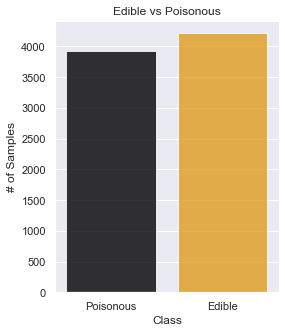

In [6]:
#Comparing instances whether Edible or Poisonous
sns.set_style("darkgrid")
sns.set(rc={"figure.figsize":(4,5)})
plt.figure()
fig1=sns.countplot(data["class"], alpha=.80, palette=["black","orange"])
plt.title("Edible vs Poisonous")
plt.ylabel("# of Samples")
plt.xlabel("Class")
fig1.set(xticklabels=["Poisonous","Edible"])
plt.show()

In [7]:
print("Unique number of each columns of data :\n",data.nunique(axis=0))

Unique number of each columns of data :
 class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


In [8]:
data.isna().sample(10)
#10 rastgele verinin içinde nan değer olup olmadığının tablosu (False = Not na, True = na value)
#Gelen rastgele değerler arasında hiç nan değer olan yoktur
#Yukarıdaki data.info() fonksiyonu ile hiç non-null değerimiz olmadığını görmüştük

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3083,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5257,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
559,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3626,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3534,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
data.rename(columns={'class':'classs'}, inplace=True) #Aşağıdaki örnekte "data.class" yazınca hata veriyordu bu yüzden bu sütunun ismini değiştirdik
data.head(10)

,classs,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [10]:
ClassBydata = data.classs.value_counts()
ClassBydata[:2]

e    4208
p    3916
Name: classs, dtype: int64

In [11]:
labelencoder=LabelEncoder() #Verileri Nümerikleştirme 
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [12]:
data.head(10)

,classs,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [13]:
data = data.drop(["veil-type"],axis=1) #the column “veil-type” is 0 and not contributing to the data so we will remove it.

In [14]:
corr = data.corr()

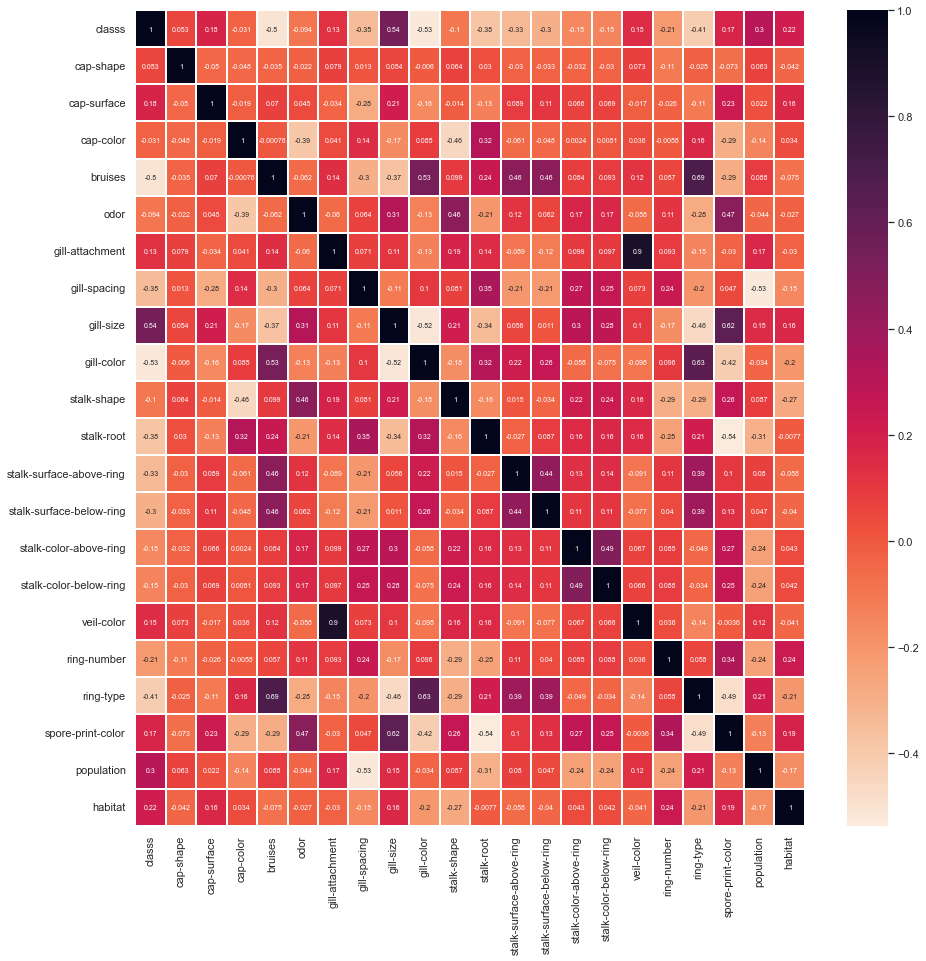

In [15]:
#Corelasyon grafiği
plt.figure(figsize=(15,15))
sns.heatmap(corr,linewidths=.1,cmap=sns.color_palette("rocket_r", as_cmap=True), annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

### d)	Briefly explain your aim. Which machine learning model do you to decide and why?

Since this is a classification problem, I think it would be appropriate to use logial Regression and naive bayes.

# STEP 1- STEP 2 - Interim Report


In [16]:
data.shape 
# Datamız 22 column ve 8124 row'dan oluşmaktadır. 
# Column sayısı bizim feature sayımıza denk gelmektedir.
# Tabii burada id name vs gibi columnları feature olarak almamamız gerekir.

(8124, 22)

In [17]:
data.info()
#Dataset ilk okunduğunda tüm column değerlerimiz object olarak geliyordu.
#Sonrasında tüm column'lara nümerikleştirme yaptığımız için artık data type'larını int olarak görmekteyiz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   classs                    8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [18]:
# Tüm sütunların dağılım grafikleri
#for feature in df.columns:
#    plt.title(feature)
#    sns.countplot(df[feature])
#    plt.show()

C:\Users\Üveys SARAÇ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


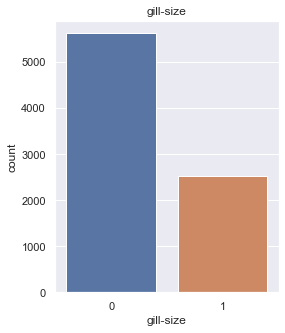

In [19]:
plt.title('gill-size')
sns.countplot(data['gill-size'])
plt.show()

# Burada gill-size değerleri ve count sayısı grafiğini görüyoruz.
# Nümerikleştirilmeyen data'da 1 = n, 0 = b'ydi.
# b = broad = geniş, n = narrow = dar değerlerine karşılık gelmektedir.
# Grafikten anlaşılacağı üzere gill-size dar olan mantarların nerdeyse 2 katı gill-size geniş mantar vardır.
# Balance değildir.

C:\Users\Üveys SARAÇ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


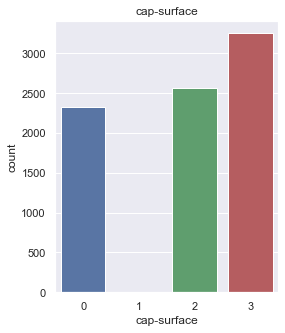

In [20]:
plt.title('cap-surface')
sns.countplot(data['cap-surface'])
plt.show()

# fibrous=f=0,grooves=g=1,scaly=y=3,smooth=s=2
# 1 değeri yani grooves olan hiç mantar yokmuş yada 0'a yakınmış.
# 0, 2 ve 3 değerlerinin birbirinden çok uzak olmadığı gözükmektedir.

In [21]:
data.isna().sum() 
# Hiç bir column'da missing value bulunmamaktadır.
# Eğer az miktarlarda missing value'lar olsaydı, missing value içeren sutünlar drop edilebilirdi.
# Eğer fazla miktarda missing value olsaydı, ortalama değer ile yada o columnlar ile korelasyonu en yüksek olan sütunlar/
# bulunup ona o sütunlardaki o değerlere göre missing valuelar ile değiştirilebilirdi. 

classs                      0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Step3: Feature Engineering 
# Step6: Further Performance Improvement 

__a)	Determine which features are the most valuable and whether you need to create a new feature?__  

In [22]:
# The feature with the highest correlation
corr["classs"].sort_values(ascending=False).head()

classs         1.000000
gill-size      0.540024
population     0.298686
habitat        0.217179
cap-surface    0.178446
Name: classs, dtype: float64

In [23]:
# The feature with the lowest correlation
corr["classs"].sort_values(ascending=True).head()

gill-color     -0.530566
bruises        -0.501530
ring-type      -0.411771
stalk-root     -0.379361
gill-spacing   -0.348387
Name: classs, dtype: float64

Yukarıda görüldüğü üzere classs'a göre korelasyon oranları verilmiştir. Bu durumda en yüksek korelasyon __gill-size__'a aittir.
En düşük korelasyon ise __bruises__  ve __gill-color__ özelliğine aittir. Yani bu 3 özellik classs değerini en çok etkileyen ve bizim için en önemli özellikler. 

New feature oluşturmaya gerek yoktur. Ben kategorik verileri nümerik değerlere dönüştürmede __label encoder__ kullandım.
__One Hot encoder__ kullanmama sebebim zaten yeterince fazla feature'um var. Ve One Hot kullansam tüm kategorik unique değerler için ayrıca yeni feature'lar oluşturacaktı. Bu durumda __feature sayısı çok fazla olacak__ ve bu hem __performans__ olarak kötü yansayacak hemde datalar iyice karışacaktı.

### __Remove constant features__

In [24]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(data)
selector.fit_transform(data).shape

(8124, 22)

In [25]:
data.shape

(8124, 22)

Özellikler arasında hepsi aynı değerli olan sutün var ise çıkartır. Çünkü instance'ların bir özelliğnin hepsinde aynı olması bize katkı sağlamaz. Ayrıca ekstra performans yükü demektir.

Burada bunu uyguladık ama tüm instance'larda aynı olan bir özellik yokmuş.

### __Remove quasi-constant features__

Bunu uygularken dikkatli olmak gerekir. Threshold değerini çok fazla verirsek yararlı olacak verileri kaybedebiliriz.

In [26]:
dataClr=data.copy()
sel = VarianceThreshold(threshold=0.05)
sel.fit(dataClr)

VarianceThreshold(threshold=0.05)

In [27]:
dataClr = sel.transform(dataClr)
print(
    len([
        x for x in data.columns
        if x not in data.columns[sel.get_support()]
    ]))

[x for x in data.columns if x not in data.columns[sel.get_support()]]

1


['gill-attachment']

**gill-attachment özelliğindeki instanceların yüzde 95'i aynı değeri içeriyormuş.
gill-attachment ile classs'ın korelasyonuna baktğımızda ise çok bir etkisi olmadığı gözüküyor (0.13) bu yüzden bu feature'ı çıkarıyorum.**

**Eski datayı kaybekmek istemediğim için bunu farklı bir isimle kaydettim.**

In [28]:
dataClrpd= pd.DataFrame(dataClr,columns=['classs', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'])

In [29]:
dataClrpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   classs                    8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-spacing              8124 non-null   int32
 7   gill-size                 8124 non-null   int32
 8   gill-color                8124 non-null   int32
 9   stalk-shape               8124 non-null   int32
 10  stalk-root                8124 non-null   int32
 11  stalk-surface-above-ring  8124 non-null   int32
 12  stalk-surface-below-ring  8124 non-null   int32
 13  stalk-color-above-ring    8124 non-null   int32
 14  stalk-color-below-ring    8124 non-null 

In [30]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

X=data.drop(["classs"],axis=1)
y=data["classs"]

m = SelectFromModel(LinearSVC(C=0.01, penalty='l1', dual=False))
m.fit(X, y)

SelectFromModel(estimator=LinearSVC(C=0.01, dual=False, penalty='l1'))

In [31]:
m.transform(X).shape

(8124, 18)

In [32]:
m.get_support()

array([False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True])

In [33]:
feature_idx = m.get_support()
feature_name = X.columns[feature_idx]
feature_name

Index(['cap-surface', 'cap-color', 'bruises', 'odor', 'gill-spacing',
       'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [34]:
dataFs = pd.DataFrame(m.transform(X), columns=feature_name)
dataFs.head(10)

,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-type,spore-print-color,population,habitat
0,2,4,1,6,0,1,4,0,3,2,2,7,7,2,4,2,3,5
1,2,9,1,0,0,0,4,0,2,2,2,7,7,2,4,3,2,1
2,2,8,1,3,0,0,5,0,2,2,2,7,7,2,4,3,2,3
3,3,8,1,6,0,1,5,0,3,2,2,7,7,2,4,2,3,5
4,2,3,0,5,1,0,4,1,3,2,2,7,7,2,0,3,0,1
5,3,9,1,0,0,0,5,0,2,2,2,7,7,2,4,2,2,1
6,2,8,1,0,0,0,2,0,2,2,2,7,7,2,4,2,2,3
7,3,8,1,3,0,0,5,0,2,2,2,7,7,2,4,3,3,3
8,3,8,1,6,0,1,7,0,3,2,2,7,7,2,4,2,4,1
9,2,9,1,0,0,0,2,0,2,2,2,7,7,2,4,2,3,3


# Step4: Machine Learning Problem 

### a)	Select the machine learning problem (Regression, Classification or Clustering) that is appropriate for your data set.


## Classification

### b)	Select 2 evaluation methods that you will use in your project, and explain them in detail by giving proper formulation.

## Logistic Regression

Logistic Regression ( Lojistik Regresyon ) sınıflandırma işlemi yapmaya yarayan bir regresyon yöntemidir. Kategorik veya sayısal verilerin sınıflandırılmasında kullanılır. Bağımlı değişkenin yani sonucun sadece 2 farklı değer alabilmesi durumda çalışır. ( Evet / Hayır, Erkek / Kadın, Şişman / Zayıf vs. )

Doğrusal sınıflandırma problemlerinde yaygın bir biçimde kullanılır. Bu sebeple Linear Regression ile çok benzemektedir.

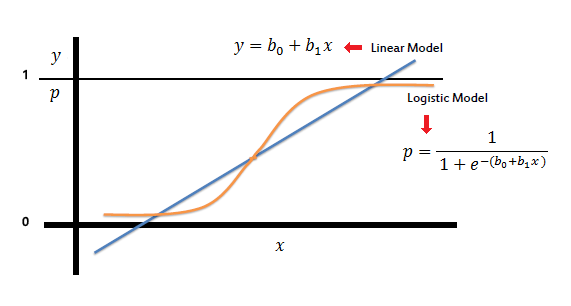

In [35]:
Image("logisticReg.png", embed=True)

Let's say we've constructed our best-fit line, i.e. our linear predictor, 
<p>
$$\hat{L} = \beta_0 + \beta_1x+\beta_2 x^2+...+\beta_n x^n$$
    
### A standard sigmoid function:

$$ S(x) = \frac{e^x}{1+e^{x}} = \frac{1}{1+e^{-x}} $$
    
Consider the following transformation: 

$$\hat{y} = \frac{1}{1+e^{-(\hat{L})}} = \frac{1}{1+e^{-(\beta_0 + \beta_1x+...+\beta_n x^n)}}$$

This function squeezes our predictions between 0 and 1.

Suppose I'm building a model to predict whether the cancer is benign (1) or malignant (0)

The class labels are mapped to '1' for indicating **benign** and '0' for indicating **malignant**.


How do we fit a line to our dependent variable if its values are already stored as probabilities? We can use the inverse of the sigmoid function, and just set our regression equation equal to that. The inverse of the sigmoid function is called the logit function, and it looks like this:

$$f(y) = ln\, \Bigg(\frac{y}{1-y}\Bigg) $$

Notice that the domain of this function is (0,1).

-----

`Proof that logit and sigmoid are inverse functions:`

$ x = \frac{1}{1+e^{-y}} $ 

so, $1 + e^{-y} = \frac{1}{x}$, 

then $e^{-y} = \frac{1-x}{x}$, 

take take log of both sides; $-y = ln\, (\frac{1-x}{x})$; 

so we can arrange $y = ln\, (\frac{x}{1-x})$

---------        

Our regression equation will now look like this:

$ ln\, \bigg(\frac{y}{1-y}\bigg) = \beta_0 + \beta_1x+\beta_2 x^2+...+\beta_n x^n$    
    
    
The LR model takes real-valued inputs and makes a prediction as to the probability of the input belonging to the default class (class 0).

If the probability is > 0.5 we can take the output as a prediction for the default class (class 0), otherwise the prediction is for the other class (class 1).
        

## K-Nearest Neighbors Classifier

- K-Nearest Neighbour is one of the simplest ML algorithms based on Supervised Learning technique. K-NN algorithm can be used for regression as well as for classification but mostly it is used for the classification problems.

- K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

- K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K-NN algorithm.

- K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

- It is also called a lazy learner algorithm because it doesn’t learn a discriminative function from the training data instead it stores (“memorizes”) the dataset and at the time of classification, it performs an action on the dataset.


- K-NN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

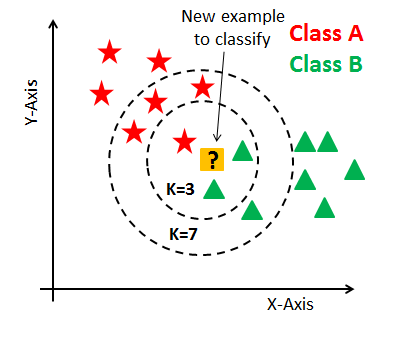

In [36]:
Image("knnC.png", embed=True, width=450, height=1050)

K-NN is a similarity based algorithm - the class membership of the observation depends on the feature similarity to training observations.

The similarity depends on the distance of observations from each other, which can be calculated using any of the distance metrics. 

The most commonly used distance metric is the Euclidean distance. However, which distance metric you use as well as the value of $K$ could affect the performance of your model. The decision boundary can change accordingly to different values of $K$.

### Distance Metrics
---

#### Manhattan Distance ($L1-norm$)
The Manhattan distance is the sum of the absolute values of the Cartesian coordinates. You can think of Manhattan distance as moving through grids. In the image below, only the green line is infeasible to calculate the Manhattan distance. The equation for calculating Manhattan distance is

$$ d\left( x,y\right)   = \sum _{i=1}^{n} |\,x_{i}-y_{i}\,|  $$

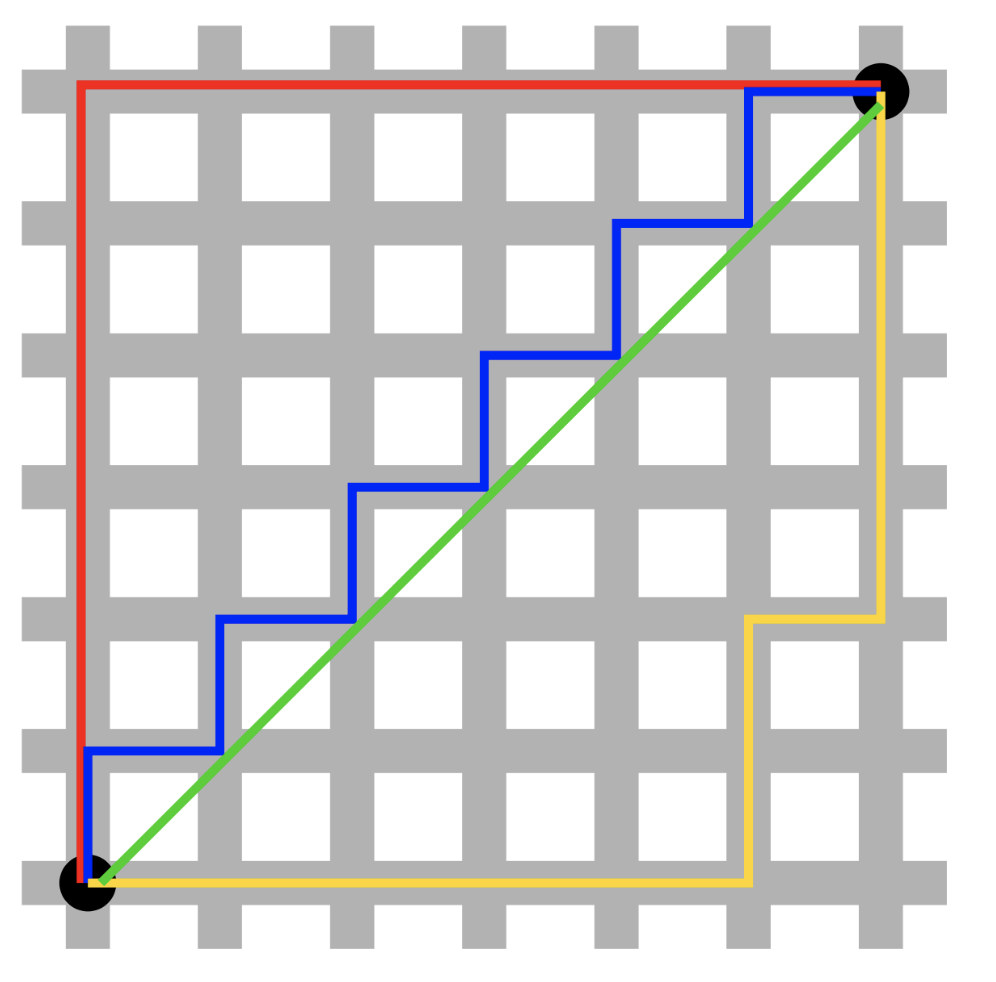

In [37]:
Image("mhtn.png", embed=True, width=350, height=950)

#### Euclidean Distance ($L2-norm$)
Euclidean distance is the shortest distance between two points, and it is the most common used distance metrics. To calculate the Euclidean distance between two coordinates a(x1,y1) and b(x2,y2), the formula is:

$$ d\left( x,y\right)   = \sqrt {\sum _{i=1}^{n}  \left( x_{i}-y_{i}\right)^2 } $$



#### Minkowski Distance ($L\rho-norm$)
Minkowski distance is a generalized format for calculating distance in n-dimensional normed vector space. It takes on the formula of:

 $$d\left(x,y\right) = \sqrt[\rho]{\sum _{i=1}^{n}  \left( x_{i}-y_{i}\right)^{\rho}}$$
 

As you can see, the Manhattan Distance and Euclidean distance are special cases of the Minkowski Distance. The Manhattan distance takes on the notation of l1 norm and Euclidean distance takes on the notation of l2 norm. What does this remind you of?

### c)	Show example visualizations associated with your selected problem.

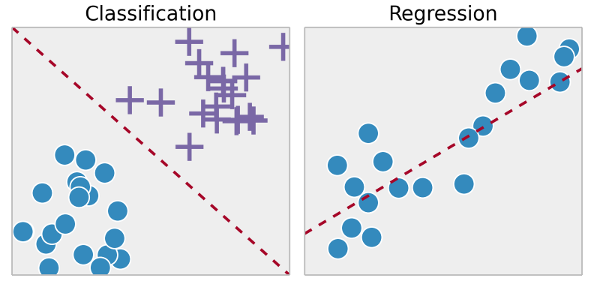

In [38]:
Image(filename='clsReg.png')

# Step5: Algorithms, Implementation and Performance Comparison 

### a)	Select 2 machine learning algorithm. For example: if you choose a classification problem, you can use Logistic Regression and Naïve Bayes Classifier.

### Logistic Regression, KNN

### b)	Give brief definition of each of two algorithms along with the parameters need to be tuned.

Logistic Regresyondaki **C**, "hiperparametre" olarak bilinir. Parametreler, modele özelliklerle ne yapacağını söyleyen sayılardır, hiperparametreler ise modele parametrelerin nasıl seçileceğini bildirir.

**Yüksek bir C değeri**, modele eğitim verilerine daha fazla ağırlık vermesini söyler. **Daha düşük bir C değeri**, veriyi uydurma pahasına karmaşıklığa daha fazla ağırlık vermek için modele işaret edecektir. Bu nedenle, yüksek bir Hiper Parametre değeri C, train verilerinin daha önemli olduğunu ve gerçek dünya verilerini yansıttığını gösterirken, düşük değer bunun tam tersidir.


**KNN**'deki **K** değeri ise en yakındaki kaç komşuya bakılsın ve ona göre belirten bir değerdir. Ve buna göre bir sınıflandırma yapılır. K değerinin **çift sayı** verilmesi tavsiye edilmez. Çünkü en yakındaki komşularına bakarken eşit sayıda çıkarsa sınıf sayısı burada rastgele bir sınıfa onu atar.

### c)	Select your base evaluation technique. Explain why did you choose this method?

**Accuracy** : modelde doğru tahmin ettiğimiz alanların toplam veri kümesine oranı ile hesaplanmaktır. 

**Precision** : özellikle False Positive tahminlemenin maliyeti yüksek olduğu durumlarda çok önemlidir. Örneğin mail kutunuza gelmesi gereken mailleri eğer modeliniz spam olarak işaretlerse (FP) bu durumda almanız gereken önemli mailleri görememiş olur ve sizin için kayıp yaratan bir durumda kalırsınız. Bu durumda Kesinlik değerinin yüksek olması bizim için model seçiminde önemli bir kriterdir.

**Recall** : değeri de False Negative olarak tahminlemenin maliyetinin yüksek olduğu durumlarda bize yardımcı olacak bir metriktir. Mümkün olduğunca yüksek olması gereklidir.

**F1 Score** : bize Kesinlik (Precision) ve Duyarlılık (Recall) değerlerinin harmonik ortalamasını göstermektedir.
Basit bir ortalama yerine harmonik ortalama olmasının sebebi ise uç durumları da gözardı etmememiz gerektiğidir. Eğer basit bir ortalama hesaplaması olsaydı Precision değeri 1 ve Recall değeri 0 olan bir modelin F1 Score’u 0.5 olarak gelecektir ve bu bizi yanıltacaktır.

**Accuracy'i değerlendirme metriği olarak seçtim, çünkü elimdeki veri dengeli dağılmış bir veri.**

### d)	Using your base evaluation technique as the quality criterion, try to find the best parameters for each of your                 clustering method.

### e) Compare the two algorithms based on the selected evaluation technique, numerically and also visually.

### Logistic Regression

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X=data.drop(["classs"],axis=1)
y=data["classs"]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [40]:
from sklearn.model_selection import cross_val_score
lr_range=[0.01,0.1,1, 100, 1000,10000]
lrCv_scores=[]
lrAc_scores=[]
for this_C in lr_range:
    lrClf = LogisticRegression(C=this_C, max_iter=10000)
    lrClf.fit(X_train,y_train)
    print('C : %0.1f for accuracy = %0.3f ' % (this_C,lrClf.score(X_test, y_test)));
    #cvScores = cross_val_score(lrClf, X, y, cv=5)
    #print("cvScores for",this_C," = ",cvScores)
    #print("cross_val_score : ",cross_val_score(lrClf, X, y, cv=5, scoring='accuracy').mean(),"\n")
    scores = lrClf.score(X_test, y_test)
    #lrCv_scores.append(cvScores.mean())
    lrAc_scores.append(scores)

C : 0.0 for accuracy = 0.907 
C : 0.1 for accuracy = 0.935 
C : 1.0 for accuracy = 0.951 
C : 100.0 for accuracy = 0.968 
C : 1000.0 for accuracy = 0.968 
C : 10000.0 for accuracy = 0.968 


Text(0, 0.5, 'Accuracy')

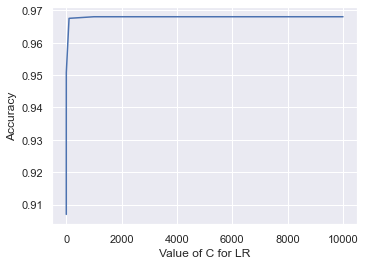

In [41]:
plt.subplots(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(lr_range, lrAc_scores)
plt.xlabel('Value of C for LR')
plt.ylabel('Accuracy')

#plt.subplot(1,2,2)
#plt.plot(lr_range, lrCv_scores)
#plt.xlabel('Value of C for LR')
#plt.ylabel('Cross-Validated Accuracy')
#plt.show()

### KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
k_range=[1,3,9,11,21]
kCv_scores=[]
kAc_scores=[]
for x in k_range:
    knn = KNeighborsClassifier(n_neighbors = x)
    knn.fit(X_train,y_train)
    
    print('K : %0.f for accuracy = %0.3f ' % (x,knn.score(X_test,y_test)));
    #cvScores = cross_val_score(knn, X, y, cv=5)
    #print("cvScores for",x," = ",cvScores)
    #print("cross_val_score : ",cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean(),"\n")
    #scores = knn.score(X_test,y_test)
    #kCv_scores.append(cvScores.mean())
    kAc_scores.append(scores)

K : 1 for accuracy = 0.999 
K : 3 for accuracy = 0.998 
K : 9 for accuracy = 0.996 
K : 11 for accuracy = 0.994 
K : 21 for accuracy = 0.991 


Text(0, 0.5, 'Accuracy')

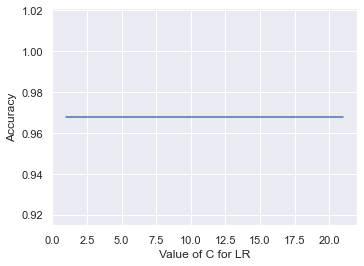

In [43]:
plt.subplots(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(k_range, kAc_scores)
plt.xlabel('Value of C for LR')
plt.ylabel('Accuracy')

#plt.subplot(1,2,2)
#plt.plot(k_range, kCv_scores)
#plt.xlabel('Value of C for LR')
#plt.ylabel('Cross-Validated Accuracy')
#plt.show()

## Visualization LR

### PCA

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_trainP = pca.fit_transform(X_train)
X_testP = pca.transform(X_test)


In [45]:
for this_C in [0.1,1, 100, 1000,10000]:
    lrClf = LogisticRegression(C=this_C, max_iter=10000)
    lrClf.fit(X_trainP,y_train)
    print('C : %0.1f for accuracy = %0.3f ' % (this_C,lrClf.score(X_testP, y_test)));
    #cvScores = cross_val_score(lrClf, X, y, cv=5)
    #print("cvScores for",this_C," = ",cvScores)
    #print("cross_val_score : ",cross_val_score(lrClf, X, y, cv=5, scoring='accuracy').mean(),"\n")

C : 0.1 for accuracy = 0.736 
C : 1.0 for accuracy = 0.736 
C : 100.0 for accuracy = 0.736 
C : 1000.0 for accuracy = 0.736 
C : 10000.0 for accuracy = 0.736 


In [46]:
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_trainP,y_train)

LogisticRegression(max_iter=10000)

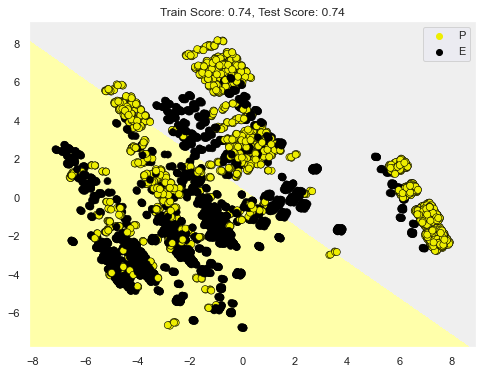

In [47]:
from utils import *

legends = ['P' if i == 1 else 'E' for i in y_train]
draw_decision_boundaries(X_trainP, y_train, X_testP, y_test, classifier, legends)

## Visualization KNN 

In [48]:
for x in [1,3,9,11,21]:
    knn = KNeighborsClassifier(n_neighbors = x)
    knn.fit(X_trainP,y_train)
    
    print('K : %0.f for accuracy = %0.3f ' % (x,knn.score(X_testP,y_test)));
    
    #cvScores = cross_val_score(knn, X, y, cv=5)
    #print("cvScores for",x," = ",cvScores)
    #print("cross_val_score : ",cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean(),"\n")

K : 1 for accuracy = 0.965 
K : 3 for accuracy = 0.953 
K : 9 for accuracy = 0.931 
K : 11 for accuracy = 0.904 
K : 21 for accuracy = 0.886 


In [49]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_trainP,y_train)

KNeighborsClassifier(n_neighbors=1)

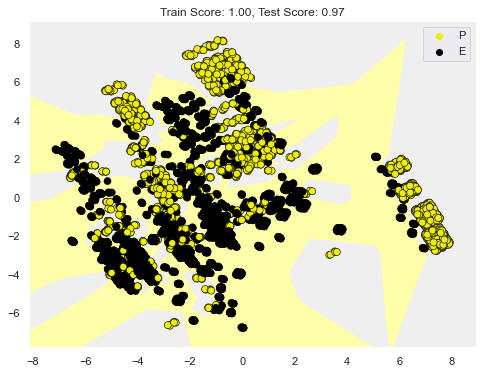

In [50]:
legends = ['P' if i == 1 else 'E' for i in y_train]
draw_decision_boundaries(X_trainP, y_train, X_testP, y_test, knn, legends)

### f)	Which algorithm performs the best? Can you explain why?

LR ve KNN pca olmadan uygulanan işlemlerde birbirine çok yakın sonuçlar vermiştir. Ama yinede KNN bu sonuçlarda da daha iyi olduğu sonucu çıkmıştır. Fakat PCA ile yapılan işlemlerde ise LR accuracy değeri büyük  bir düşüş gösterirken KNN de ise büyük bir değişim olmadığı gözükmüştür. Her iki şekilde de KNN algoritması daha iyi sonuçlar vermiştir.

# Step6: Further Performance Improvement (Your best algorithm) 

### a)	Remove outliers (if there are any) in your data. Check if this improved your algorithm’s performance. Show before and after performance of your algorithm (both visually and numerically)

#### Outliers bulma ve çıkarma işlemi yapamıyorum çünkü datasetteki tüm veriler kategorik.

### h)	Apply a feature selection method. Check if this improved your algorithm’s performance. 

#### Yukarıda uygulandı.

### Show before and after performance of your algorithm 

In [51]:
X=dataFs
y=data["classs"]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)


# Grid Search LR

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.model_selection import GridSearchCV
LR_model= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2'] ,'max_iter':[10000]
                   }
LR= GridSearchCV(LR_model, tuned_parameters,cv=5,scoring='accuracy')
LR.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [10000], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [54]:
print(LR.best_params_)

{'C': 1000, 'max_iter': 10000, 'penalty': 'l2'}


In [55]:
this_C=LR.best_params_["C"]
lrClf= LogisticRegression(**LR.best_params_)
lrClf.fit(X_train,y_train)
print('C : %0.1f for accuracy = %0.3f ' % (this_C,lrClf.score(X_test, y_test)));
#cvScores = cross_val_score(lrClf, X, y, cv=5)
#print("cvScores for",this_C," = ",cvScores)
#print("Mean of cvScores : ",cross_val_score(lrClf, X, y, cv=5, scoring='accuracy').mean(),"\n")

C : 1000.0 for accuracy = 0.969 


**Random state'leri özellikle eşit olarak verdikki aynı train test setleri kullanılsın.**

**Feature Selection ile 4 feature kaldırdığımız dataset ile yapılan LR'deki sonuçlar, Feature selection olmayan verinin sonuçarına göre daha iyi çıkmıştır.**

# Grid Search KNN

In [56]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [57]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [58]:
this_K=grid_search.best_params_["n_neighbors"]
knn = KNeighborsClassifier(**grid_search.best_params_)
knn.fit(X_train,y_train)
print('K : %0.f for accuracy = %0.3f ' % (this_K,knn.score(X_test,y_test)));
#cvScores = cross_val_score(knn, X, y, cv=5)
#print("cvScores for",x," = ",cvScores)
#print("cross_val_score : ",cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean(),"\n")
#scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
#k_scores.append(scores.mean())

K : 1 for accuracy = 1.000 


# Step7: Inference 

**İki farklı makine öğrenmesi algoritması denendi.
İlk olarak future selection olmadan sınıflandırma algoritmaları çalıştırıldı.
İki algortima içinde yüksek accuracy değerleri elde edildi.** 

**Sonraki aşamada future selection ile bazı feature'lar kaldırıldı.
Ve bu şekilde iki algortimanında acuuracy değerleri kısmen arttı.
Future Selection yapmak hem accuracy skorunu arttırdı hemde daha az feature demek daha az performans harcamak demek.**

**GridSearch ve PCA kullanıldı.**

**KNN ile son yapılan sınıflandırmada accuracy skoru 1.0 çıktı bu da demek oluyor ki bize verilen her hangi bir mantarın özelliklerine bakarak onun yenilebilir mi yoksa zehirli mi olduğuna %100 doğruluk ile sınıflandırabilyoruz.**